In [1]:
import matplotlib.pyplot as plt
import os

import pyopia.classify
import pyopia.process
import pyopia.statistics
import pyopia.pipeline
import pyopia.instrument.silcam
import pyopia.io
import pyopia.tests.testdata
import pyopia.plotting

In [2]:
filename = pyopia.tests.testdata.get_example_silc_image(os.getcwd())

In [3]:
data = dict()
settings = {'general': {'raw_files': None,
                        'pixel_size': 24},
            'steps': {'intro': 'non-standard pipeline.'}
           }

In [4]:
MyPipeline = pyopia.pipeline.Pipeline(settings=settings, initial_steps='')

Initialising pipeline
raw_files: None
Pipeline ready with these data:  ['cl', 'settings', 'raw_files']


In [5]:
MyPipeline.settings

{'general': {'raw_files': None, 'pixel_size': 24},
 'steps': {'intro': 'non-standard pipeline.'}}

In [6]:
model_path = pyopia.tests.testdata.get_example_model(os.getcwd())

MyPipeline.settings['steps'].update({'classifier':
                                       {'pipeline_class': 'pyopia.classify.Classify',
                                       'model_path': model_path}
                                    })
MyPipeline.run_step('classifier')
# This is the same as running:
# MyPipeline.data['cl'] = pyopia.classify.Classify(model_path=model_path)
# Note: the classifier step is special in that it's output is specifically data['cl'], rather than other new keys in data

MyPipeline.data

Classify  ready with: {'model_path': 'keras_model.h5'}  and data dict_keys(['cl', 'settings', 'raw_files'])


{'cl': <pyopia.classify.Classify at 0x103468220>,
 'settings': {'general': {'raw_files': None, 'pixel_size': 24},
  'steps': {'intro': 'non-standard pipeline.',
   'classifier': {'pipeline_class': 'pyopia.classify.Classify',
    'model_path': 'keras_model.h5'}}},
 'raw_files': None}

In [7]:
# since we are not going to be using MyPipeline.run(filename) here, we need to add this into the pipeline data:
MyPipeline.data['filename'] = filename

MyPipeline.settings['steps'].update({'load':
                                       {'pipeline_class': 'pyopia.instrument.silcam.SilCamLoad'}
                                    })
MyPipeline.run_step('load')

# This is the same as running:
#SilCamLoad = pyopia.instrument.silcam.SilCamLoad()
#MyPipeline.data = SilCamLoad(MyPipeline.data)
#plt.imshow(MyPipeline.data['imraw'][:,:,:]/255)

MyPipeline.data

SilCamLoad  ready with: {}  and data dict_keys(['cl', 'settings', 'raw_files', 'filename'])


{'cl': <pyopia.classify.Classify at 0x103468220>,
 'settings': {'general': {'raw_files': None, 'pixel_size': 24},
  'steps': {'intro': 'non-standard pipeline.',
   'classifier': {'pipeline_class': 'pyopia.classify.Classify',
    'model_path': 'keras_model.h5'},
   'load': {'pipeline_class': 'pyopia.instrument.silcam.SilCamLoad'}}},
 'raw_files': None,
 'filename': 'D20181101T142731.838206.silc',
 'timestamp': Timestamp('2018-11-01 14:27:31.838206'),
 'imraw': array([[[ 77.,  70.,  64.],
         [ 76.,  67.,  64.],
         [ 75.,  64.,  53.],
         ...,
         [103.,  91.,  83.],
         [ 97.,  91.,  79.],
         [ 97.,  96.,  75.]],
 
        [[ 82.,  73.,  64.],
         [ 80.,  71.,  64.],
         [ 78.,  68.,  53.],
         ...,
         [ 98.,  92.,  83.],
         [ 96.,  89.,  79.],
         [ 96.,  91.,  75.]],
 
        [[ 86.,  77.,  68.],
         [ 84.,  75.,  68.],
         [ 82.,  73.,  58.],
         ...,
         [ 93.,  91.,  80.],
         [ 95.,  90.,  80

ImagePrep  ready with: {'image_level': 'imraw'}  and data dict_keys(['cl', 'settings', 'raw_files', 'filename', 'timestamp', 'imraw'])


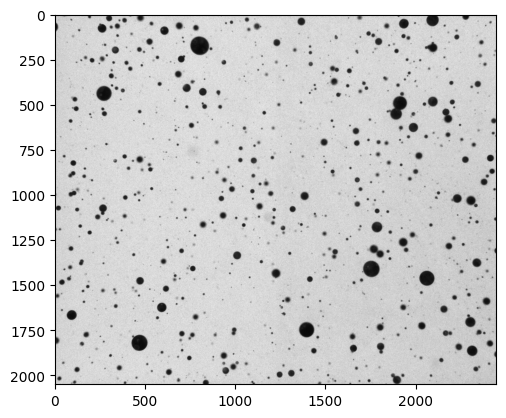

In [8]:
MyPipeline.settings['steps'].update({'imageprep':
                                       {'pipeline_class': 'pyopia.instrument.silcam.ImagePrep',
                                        'image_level': 'imraw'}
                                    })
MyPipeline.run_step('imageprep')
# This is the same as running:
# ImagePrep = pyopia.instrument.silcam.ImagePrep(image_level='imraw')
# MyPipeline.data = ImagePrep(MyPipeline.data)

plt.imshow(MyPipeline.data['imc'], cmap='grey')

In [9]:
settings['steps'].update({'segmentation':
                            {'pipeline_class': 'pyopia.process.Segment',
                            'threshold': 0.85}}
                        )

Segment = pyopia.process.Segment(threshold=settings['steps']['segmentation']['threshold'])
data = Segment(data)
plt.imshow(~data['imbw'], cmap='grey')

KeyError: 'imc'

In [ ]:
# @todo Example dilation of everything
import skimage

data['imbw-original'] = data['imbw']
data['imbw-dilated'] = skimage.morphology.binary_dilation(data['imbw-original'])

plt.imshow(data['imbw-original'].astype(int) - data['imbw-dilated'].astype(int), cmap='grey')

data['imbw'] = data['imbw-dilated']

settings.update({'steps':
                    {'dilation':
                        {'custom step': 'dilate segmented image by 1 pixel'}}}
                )

In [ ]:
CalculateStats = pyopia.process.CalculateStats()
data = CalculateStats(data)

In [ ]:
# @todo Example plot bounding boxes

In [ ]:
xstats = pyopia.io.make_xstats(data['stats'], settings)
xstats